In [1]:
#Import Necessary Packages
import numpy as np
import pandas as pd
import tensorflow
import keras
import os
import imutils
import cv2
from imutils import paths
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv(r"F:\Computer Vision 2\The Sports Classification DataSet\dataset\train.csv")
df.head()

,image_ID,label
0,7c225f7b61.jpg,Badminton
1,b31.jpg,Badminton
2,acb146546c.jpg,Badminton
3,0e62f4d8f2.jpg,Badminton
4,cfd2c28c74.jpg,Cricket


In [3]:
df['label'].value_counts()

Cricket      1556
Wrestling    1471
Tennis       1445
Badminton    1394
Soccer       1188
Swimming      595
Karate        578
Name: label, dtype: int64

In [4]:
# initialize the set of labels from the spots activity dataset we are
# going to train our network on
LABELS=set(['Soccer','Tennis','Wrestling'])
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images

imagePaths=list(paths.list_images(r"F:\Computer Vision 2\The Sports Classification DataSet\dataset\train1"))
data=[]
labels=[]

for imagepath in imagePaths:
    label=imagepath.split(os.path.sep)[-2]
    
    if label not in LABELS:
        continue
    image=cv2.imread(imagepath)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,dsize=(224,224))
    
    data.append(image)
    labels.append(label)

In [5]:
data=np.array(data)
labels=np.array(labels)

In [6]:
data

array([[[[  2,   1,   0],
         [  2,   1,   0],
         [  2,   1,   0],
         ...,
         [  0,   1,   4],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  2,   1,   0],
         [  2,   1,   0],
         [  2,   1,   0],
         ...,
         [  0,   1,   4],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  1,   1,   0],
         [  1,   1,   0],
         [  1,   1,   0],
         ...,
         [  0,   1,   2],
         [  0,   0,   1],
         [  0,   0,   1]],

        ...,

        [[  1,   1,   0],
         [  1,   2,   0],
         [  1,   2,   0],
         ...,
         [  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [7]:
labels

array(['Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer',
       'Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer',
       'Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer',
       'Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer',
       'Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer',
       'Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer',
       'Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer',
       'Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer',
       'Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer',
       'Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer',
       'Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer',
       'Soccer', 'Soccer', 'Soccer', 'Tennis', 'Tennis', 'Tennis',
       'Tennis', 'Tennis', 'Tennis', 'Tennis', 'Tennis', 'Tennis',
       'Tennis', 'Tennis', 'Tennis', 'Tennis', 'Tennis', 'Tennis',
       'Tennis', 'Tennis', 'Tennis', 'Tennis', 'Tennis', 'Tenn

In [10]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [11]:
lb.classes_

array(['Soccer', 'Tennis', 'Wrestling'], dtype='<U9')

In [12]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(data,labels,test_size=0.20,random_state=101)

In [13]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
# initialize the training data augmentation object
trainAug=ImageDataGenerator(rotation_range=30,
                            zoom_range=0.15,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.15,
                            horizontal_flip=True,
                            fill_mode='nearest')
valAug=ImageDataGenerator()

In [15]:
# define the ImageNet mean subtraction (in RGB order) and set the
# the mean subtraction value for each of the data augmentation
# objects
mean=np.array([123.68,116.779,103.939],dtype='float32')
trainAug.mean=mean
valAug.mean=mean

In [16]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input
basemodel=ResNet50(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

In [17]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [18]:
for layer in basemodel.layers:
    layer.trainable=False

In [19]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Flatten,Conv2D,AveragePooling2D,BatchNormalization,Dropout,Dense

In [31]:
# construct the head of the model that will be placed on top of the
# the base model
headmodel=basemodel.output
headmodel=AveragePooling2D(pool_size=(7,7))(headmodel)
headmodel=Flatten(name='flatten')(headmodel)
headmodel=Dense(512,activation='relu')(headmodel)
headmodel=BatchNormalization()(headmodel)
headmodel=Dropout(0.4)(headmodel)
headmodel=Dense(len(lb.classes_),activation='softmax')(headmodel)
model=Model(inputs=basemodel.input,outputs=headmodel)

In [32]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [35]:
from tensorflow.keras.optimizers import SGD
args={'epochs':50}
opt=SGD(learning_rate=1e-4,momentum=0.9,decay=1e-4/args['epochs'])
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
history=model.fit(x=trainAug.flow(train_X,train_Y,batch_size=32),
                  steps_per_epoch=len(train_X)//32,
                  validation_data=valAug.flow(test_X,test_Y),
                  validation_steps=len(test_X)//32,
                   epochs=args['epochs'])

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4/4 [==============================] - ETA: 0s - loss: 1.8894 - accuracy: 0.3056WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000025EA3388DC8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

In [37]:
# evaluate the network
print('[INFO] evaluating model....')
predictions=model.predict(x=test_X.astype('float32'),batch_size=32)

[INFO] evaluating model....
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [38]:
from sklearn.metrics import classification_report
print(classification_report(test_Y.argmax(axis=1),predictions.argmax(axis=1),target_names=lb.classes_))

              precision    recall  f1-score   support

      Soccer       1.00      1.00      1.00        17
      Tennis       1.00      0.50      0.67         6
   Wrestling       0.81      1.00      0.90        13

    accuracy                           0.92        36
   macro avg       0.94      0.83      0.85        36
weighted avg       0.93      0.92      0.91        36



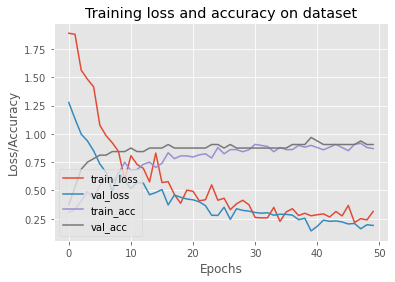

In [40]:
# plot the training loss and accuracy
N=args['epochs']
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0,N),history.history['loss'],label='train_loss')
plt.plot(np.arange(0,N),history.history['val_loss'],label='val_loss')
plt.plot(np.arange(0,N),history.history['accuracy'],label='train_acc')
plt.plot(np.arange(0,N),history.history['val_accuracy'],label='val_acc')
plt.title('Training loss and accuracy on dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')
plt.show()

In [41]:
model.save('video_classif.h5.1_Feb_2023')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity t

In [42]:
from tensorflow.keras.models import load_model

In [43]:
my_model=load_model('video_classif.h5.1_Feb_2023')

# Video classification with Keras and rolling prediction averaging

In [44]:
args={'label-bin':True,
     'input':r"F:\Computer Vision 2\The Sports Classification DataSet\The Best Game Of Tennis Ever  Australian Open 2012.mp4",
      'output':r"F:\Computer Vision 2\The Sports Classification DataSet",
      'size':128}

In [46]:
# initialize the image mean for mean subtraction along with the
# predictions queue

from collections import deque
mean=np.array([123.68,116.779,103.939][::1],dtype='float32')
Q=deque(maxlen=args['size'])

In [ ]:
vs=cv2.VideoCapture(args['input'])
writer=None
(W,H)=(None,None)

while True:
    grabbed,frame=vs.read()
    if not grabbed:
        break
    if W is None and H is None:
        (W,H)=frame.shape[:2]
        
    output=frame.copy()
    frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    frame=cv2.resize(frame,dsize=(224,224)).astype('float32')
    frame-=mean
    
    preds=my_model.predict(np.expand_dims(frame,axis=0))[0]
    Q.append(preds)
    
    results=np.array(Q).mean(axis=0)
    i=np.argmax(results)
    label=lb.classes_[i]
    
    text='activity {}'.format(label)
    cv2.putText(output,text,(35,50),cv2.FONT_HERSHEY_SIMPLEX,1.20,(0,255,0),5)
    
    if writer is None:
        fourcc=cv2.VideoWriter_fourcc(*'MJPG')
        writer=cv2.VideoWriter(args['output'],fourcc,30,(W,H),True)
        
    writer.write(output)
    cv2.imshow('Output',output)
    
    key=cv2.waitKey(1)& 0xFF    
    if key==ord('q'):
        break
        
print('[INFO] cleaning up.....')
vs.release()
writer.release()